Nama Kelompok :



1. Restu Aditya Rachman (1301190433)

2. Muhamad Hasbi Ashshiddiqi (1301190476) 

3. Muhammad Rizqi Ramadhan (1301193325)



In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def initiate_population(n_population, len_chrom):
  population = []
  for i in range(n_population):
    chromosom = []
    for j in range(len_chrom):
      chromosom.append(random.randint(0,1))
    population.append(chromosom)

  return population


In [3]:
def f(x, y):
  return (math.cos(x**2)*math.sin(y**2)) + (x + y)

In [4]:
def fitness(x, y):
  return f(x, y)

In [5]:
def calculate_x_y(chrom, r):
  top_x = 0
  bottom_x = 0

  top_y = 0
  bottom_y = 0

  half = len(chrom)//2

  # dari kiri sampe tengah
  chrom_x = chrom[:half]

  # dari tengah sampe kanan
  chrom_y = chrom[half:]

  for i in range(len(chrom_x)):
    top_x += chrom_x[i] * 2**-(i+1)
    bottom_x += 2**-(i+1)
  
  for i in range(len(chrom_y)):
    top_y += chrom_y[i] * 2**-(i+1)
    bottom_y += 2**-(i+1)


  x = r["x_min"] + (r["x_max"] - r["x_min"])*top_x/bottom_x
  y = r["y_min"] + (r["y_max"] - r["y_min"])*top_y/bottom_y

  return x,y

In [6]:
def rws(population, fit_population):
  total = 0

  for indv in range(len(population)):
    total += fit_population[indv]

  r = random.random()
  indv = 0
  while r > 0 :
    r-= fit_population[indv]/total
    indv += 1
  return indv-1

In [7]:
def parent_selection(population):
  len_population = len(population)

  fit_population = []
  for indv in range(len_population):
    x,y = calculate_x_y(population[indv], r)
    fit_population.append(fitness(x,y))
  
  fit_max = max(fit_population)
  fit_min = min(fit_population)

  # normalisasi
  for i in range(len_population):
    fit_population[i] = (fit_population[i] - fit_min) / (fit_max - fit_min)

  parent = []
  while len(parent) < 2: 
    indv = rws(population, fit_population)
    parent.append(population[indv])

  return parent
  

In [8]:
def crossover2point(parent):
  len_chrom = len(parent[0])
  
  t1 = random.randint(1, len_chrom//3)
  t2 = random.randint(t1+1, len_chrom-1)
  
  child = [[],[]]
  child[0] = parent[0][:t1] + parent[1][t1:t2] + parent[0][t2:]
  child[1] = parent[1][:t1] + parent[0][t1:t2] + parent[1][t2:]

  return child

In [9]:
def mutation(child, prob):
  for i in range(len(child)):
    for j in range(len(child[0])):
      if (random.random() <= prob):
        if child[i][j] == 0:
          child[i][j] = 1
        else:
          child[i][j] = 0
  return child

In [10]:
 r = {
     "x_max" : 2,
     "x_min" : -1,
     "y_max" : 1,
     "y_min" : -1
 }
 n_generation = 100
 prob_crossover = 0.8
 prob_mutation = 0.1
 len_chrom = 20
 len_population = 100
 n_elitism = 2
 population = initiate_population(len_population, len_chrom)
 best_gen = []
 count = 0
 i = 0
 while i < n_generation and count < 100:
   fitness_population = []
   for chrom in population:
     x, y = calculate_x_y(chrom, r)
     fitness_population.append(fitness(x,y))
   best_gen.append(max(fitness_population))
   if best_gen[i] == best_gen[i-1]:
     count+=1

   sorted_pop = [k for _, k in sorted(zip(fitness_population, population), reverse=True)]
   
   new_pop = sorted_pop[:n_elitism]
   while len(new_pop) < len_population:
     parent = parent_selection(population)
     if random.random() < prob_crossover:
       child = crossover2point(parent)
       child = mutation(child, prob_mutation)
     else:
       child = parent + []
     new_pop = new_pop + child
   
     
   population = new_pop + []
   i+=1
 print(f"Generasi ke-{i}, Best = : {best_gen[i-1]}")
print(f"Kromosom tebaik {sorted_pop[0]} \ndengan x dan y {calculate_x_y(sorted_pop[0], r)}")



Generasi ke-100, Best = : 2.481727432155131
Kromosom tebaik [1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
dengan x dan y (0.8680351906158357, 1.0)


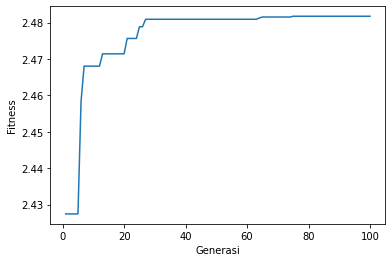

In [11]:
plt.plot(range(1, i+1), best_gen)
plt.xlabel("Generasi")
plt.ylabel("Fitness")
plt.show()